In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sentiment_dataset.csv')

In [4]:
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [5]:
df.duplicated().sum()

20

In [6]:
df = df.drop_duplicates()

In [7]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [8]:
df_new = df[['Text', 'Sentiment']]

In [9]:
df_new

Text    Sentiment
0     Enjoying a beautiful day at the park!        ...   Positive  
1     Traffic was terrible this morning.           ...   Negative  
2     Just finished an amazing workout! 💪          ...   Positive  
3     Excited about the upcoming weekend getaway!  ...   Positive  
4     Trying out a new recipe for dinner tonight.  ...   Neutral   
..                                                 ...          ...
727  Collaborating on a science project that receiv...       Happy 
728  Attending a surprise birthday party organized ...       Happy 
729  Successfully fundraising for a school charity ...       Happy 
730  Participating in a multicultural festival, cel...       Happy 
731  Organizing a virtual talent show during challe...       Happy 

[712 rows x 2 columns]

# text cleaning or pre-processing

In [10]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [11]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [12]:
df_new['Text']

0                  enjoying a beautiful day at the park!
1                     traffic was terrible this morning.
2                    just finished an amazing workout! 💪
3            excited about the upcoming weekend getaway!
4            trying out a new recipe for dinner tonight.
                             ...                        
727    collaborating on a science project that receiv...
728    attending a surprise birthday party organized ...
729    successfully fundraising for a school charity ...
730    participating in a multicultural festival, cel...
731    organizing a virtual talent show during challe...
Name: Text, Length: 712, dtype: object

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [15]:
df_new['Text']= df_new['Text'].apply(lambda x:remove_punctuation(x))

In [16]:
df_new['Text']

0                   enjoying a beautiful day at the park
1                      traffic was terrible this morning
2                     just finished an amazing workout 💪
3             excited about the upcoming weekend getaway
4             trying out a new recipe for dinner tonight
                             ...                        
727    collaborating on a science project that receiv...
728    attending a surprise birthday party organized ...
729    successfully fundraising for a school charity ...
730    participating in a multicultural festival cele...
731    organizing a virtual talent show during challe...
Name: Text, Length: 712, dtype: object

In [17]:
import re
import nltk
from wordcloud import WordCloud

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
def remove_stopwords(text):
    output = " ".join(i for i in text.split() if i not in stopwords)
    return output

df_new['Text'] = df_new['Text'].apply(lambda x: remove_stopwords(x))

In [21]:
df_new['Text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                             finished amazing workout 💪
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Text, Length: 712, dtype: object

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
wordnet_lemmatizer = WordNetLemmatizer()

In [24]:
def lemmatizer(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

In [25]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer(x))

In [26]:
df_new['Text']

0                            enjoying beautiful day park
1                               traffic terrible morning
2                             finished amazing workout 💪
3                       excited upcoming weekend getaway
4                       trying new recipe dinner tonight
                             ...                        
727    collaborating science project received recogni...
728    attending surprise birthday party organized fr...
729    successfully fundraising school charity initia...
730    participating multicultural festival celebrati...
731    organizing virtual talent show challenging tim...
Name: Text, Length: 712, dtype: object

In [27]:
def lemmatizer_new(text):
    lemm_text = " ".join([wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    return lemm_text

In [28]:
df_new['Text']=df_new['Text'].apply(lambda x:lemmatizer_new(x))

In [29]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [30]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [31]:
df_new['Text'] = df_new['Text'].apply(lambda x: clean_text(x))

In [32]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [33]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [34]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_digits(x))

In [35]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                 finish amaze workout 💪
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [36]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [37]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_emojis(x))

In [38]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [39]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

In [40]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [41]:
df_new['Text'] = df_new['Text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [42]:
df_new['Text']

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [43]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [44]:
df_new['Text'] = df_new['Text'].apply(lambda x: remove_urls(x))

In [45]:
df_new['Text'] 

0                               enjoy beautiful day park
1                               traffic terrible morning
2                                  finish amaze workout 
3                        excite upcoming weekend getaway
4                          try new recipe dinner tonight
                             ...                        
727    collaborate science project receive recognitio...
728    attend surprise birthday party organize friend...
729    successfully fundraise school charity initiati...
730    participate multicultural festival celebrate d...
731    organize virtual talent show challenge time br...
Name: Text, Length: 712, dtype: object

In [46]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [47]:
sia = SentimentIntensityAnalyzer()

In [48]:
df_new['sentiment'] = df_new['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [49]:
df_new

Text    Sentiment  sentiment
0                             enjoy beautiful day park   Positive       0.7964
1                             traffic terrible morning   Negative      -0.4767
2                                finish amaze workout    Positive       0.5423
3                      excite upcoming weekend getaway   Positive       0.4767
4                        try new recipe dinner tonight   Neutral        0.0000
..                                                 ...          ...        ...
727  collaborate science project receive recognitio...       Happy      0.7845
728  attend surprise birthday party organize friend...       Happy      0.9538
729  successfully fundraise school charity initiati...       Happy      0.8689
730  participate multicultural festival celebrate d...       Happy      0.8910
731  organize virtual talent show challenge time br...       Happy      0.6808

[712 rows x 3 columns]

In [50]:
df_new['sentiment_category'] = df_new['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [51]:
df_new

Text    Sentiment  \
0                             enjoy beautiful day park   Positive     
1                             traffic terrible morning   Negative     
2                                finish amaze workout    Positive     
3                      excite upcoming weekend getaway   Positive     
4                        try new recipe dinner tonight   Neutral      
..                                                 ...          ...   
727  collaborate science project receive recognitio...       Happy    
728  attend surprise birthday party organize friend...       Happy    
729  successfully fundraise school charity initiati...       Happy    
730  participate multicultural festival celebrate d...       Happy    
731  organize virtual talent show challenge time br...       Happy    

     sentiment sentiment_category  
0       0.7964           Positive  
1      -0.4767           Negative  
2       0.5423           Positive  
3       0.4767           Positive  
4       0.0000            Neutral  
..         ...                ...  
727     0.7845           Positive  
728     0.9538           Positive  
729     0.8689           Positive  
730     0.8910           Positive  
731     0.6808           Positive  

[712 rows x 4 columns]

In [52]:
df = df_new[['Text', 'sentiment_category']]

In [53]:
label_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
df['sentiment_category'] = df['sentiment_category'].map(label_mapping)

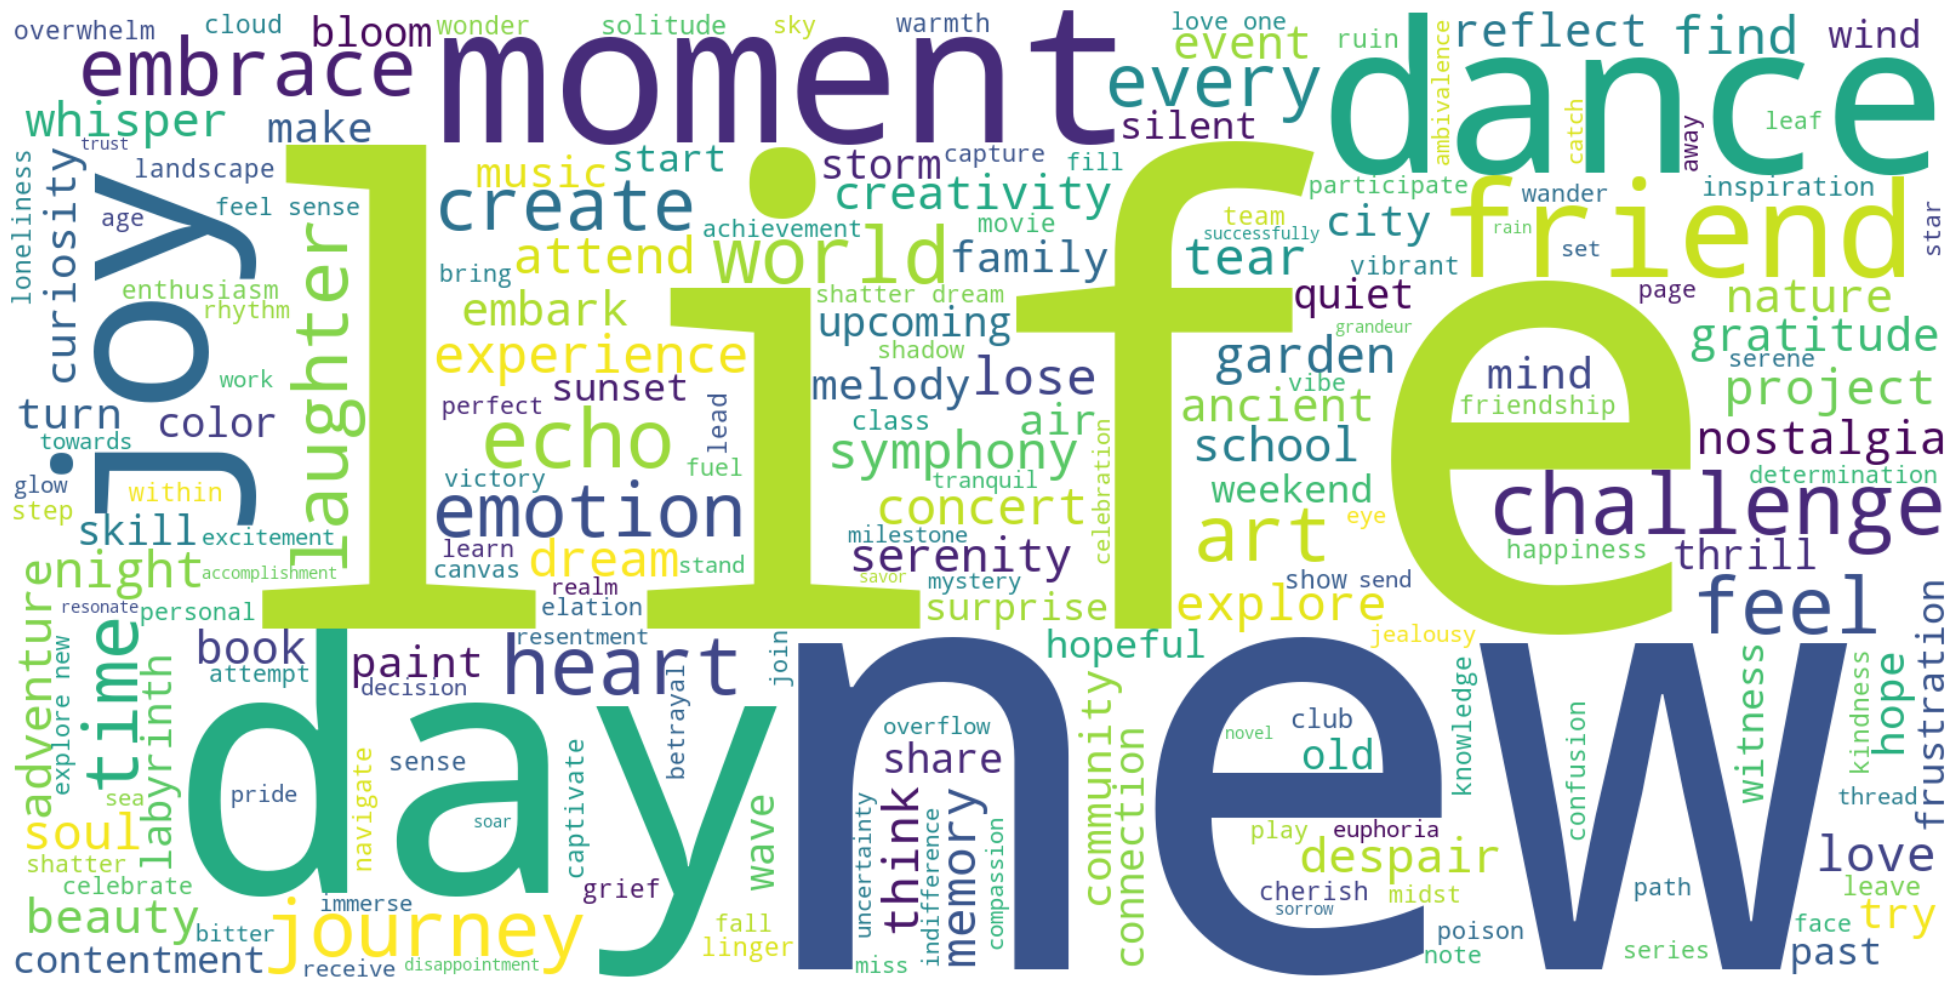

In [56]:
wordcloud = WordCloud(background_color='white', width=1600, height=800).generate(' '.join(df['Text']))
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

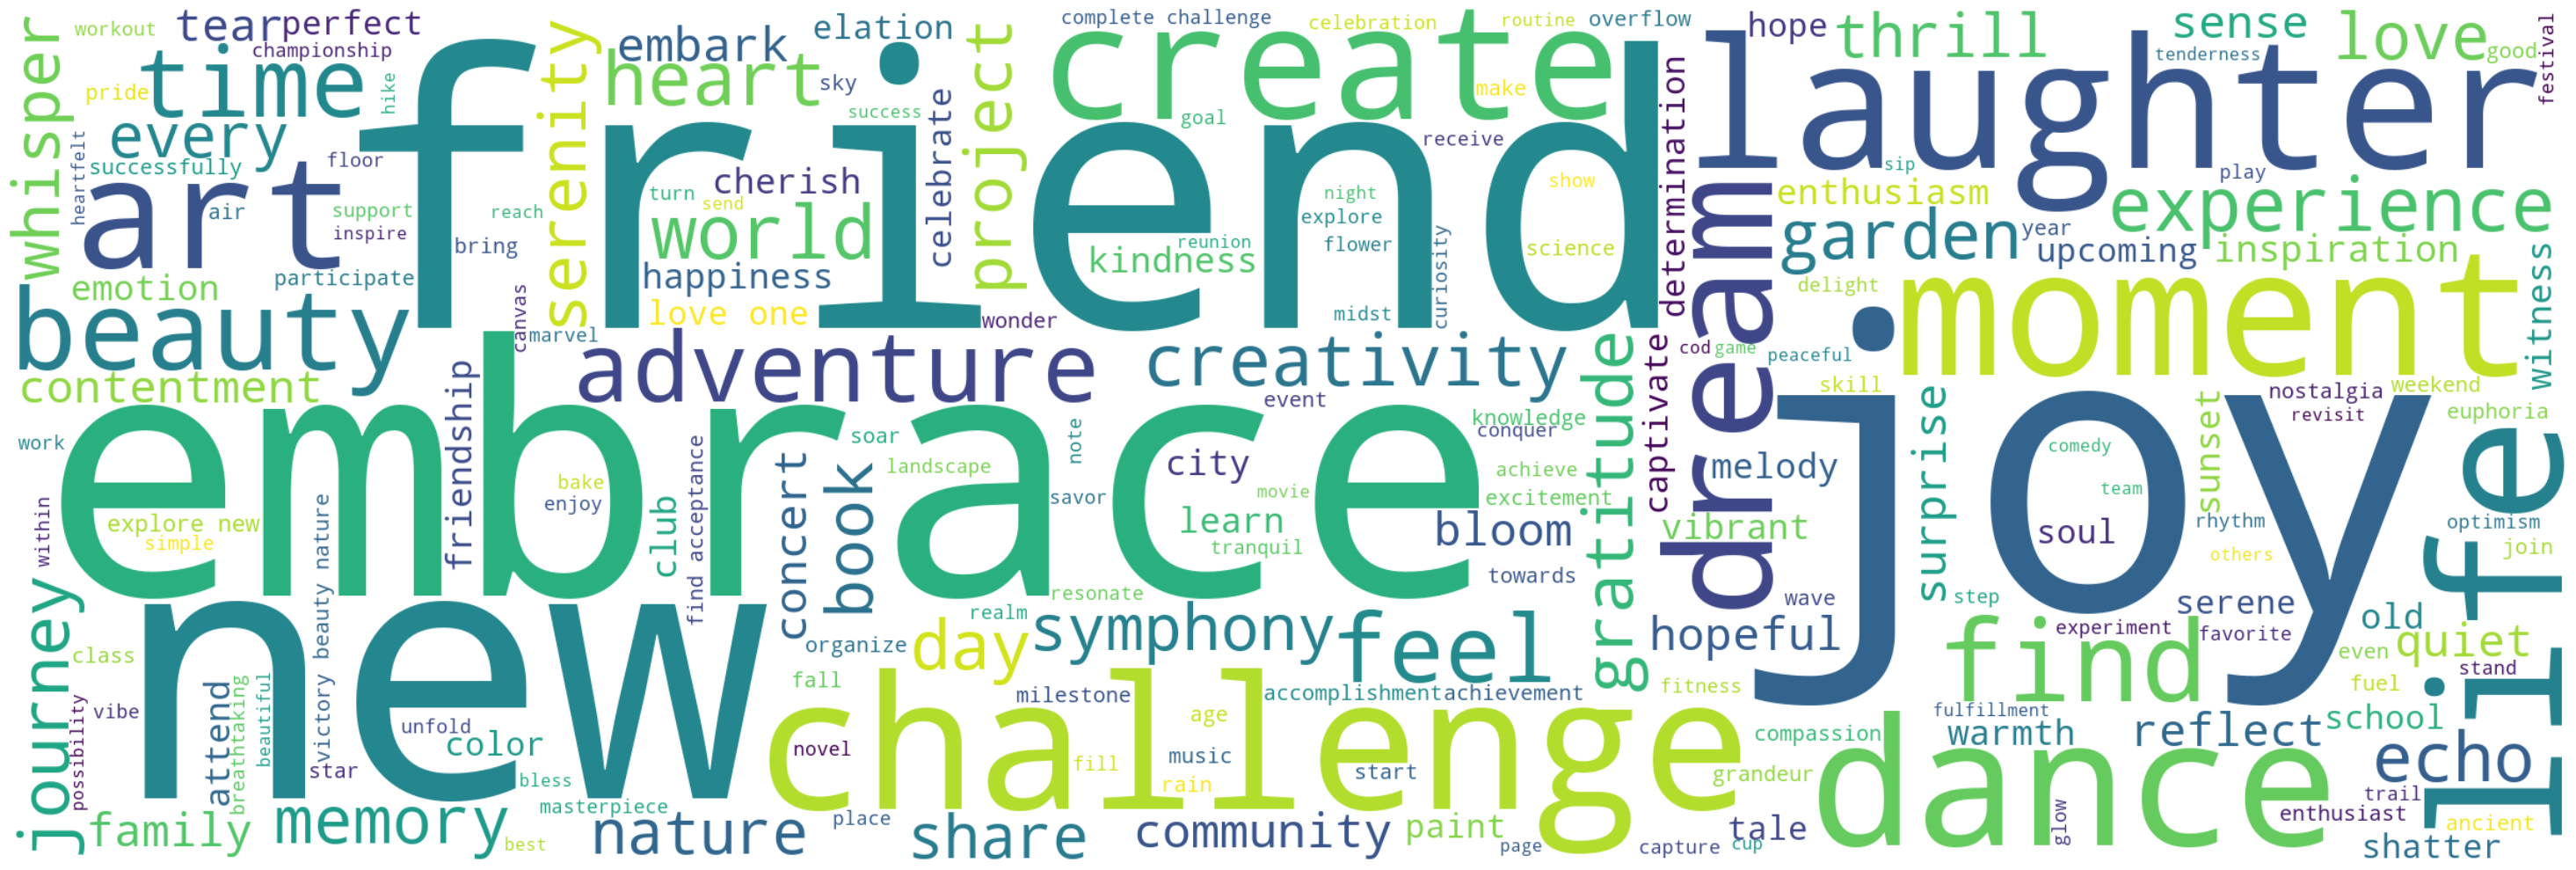

In [57]:
positive_text = ' '.join(df.loc[df['sentiment_category'] == 1, 'Text'])

if positive_text.strip():
    wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(positive_text)
    plt.figure(figsize=(30, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('No positive text data available for word cloud generation.')

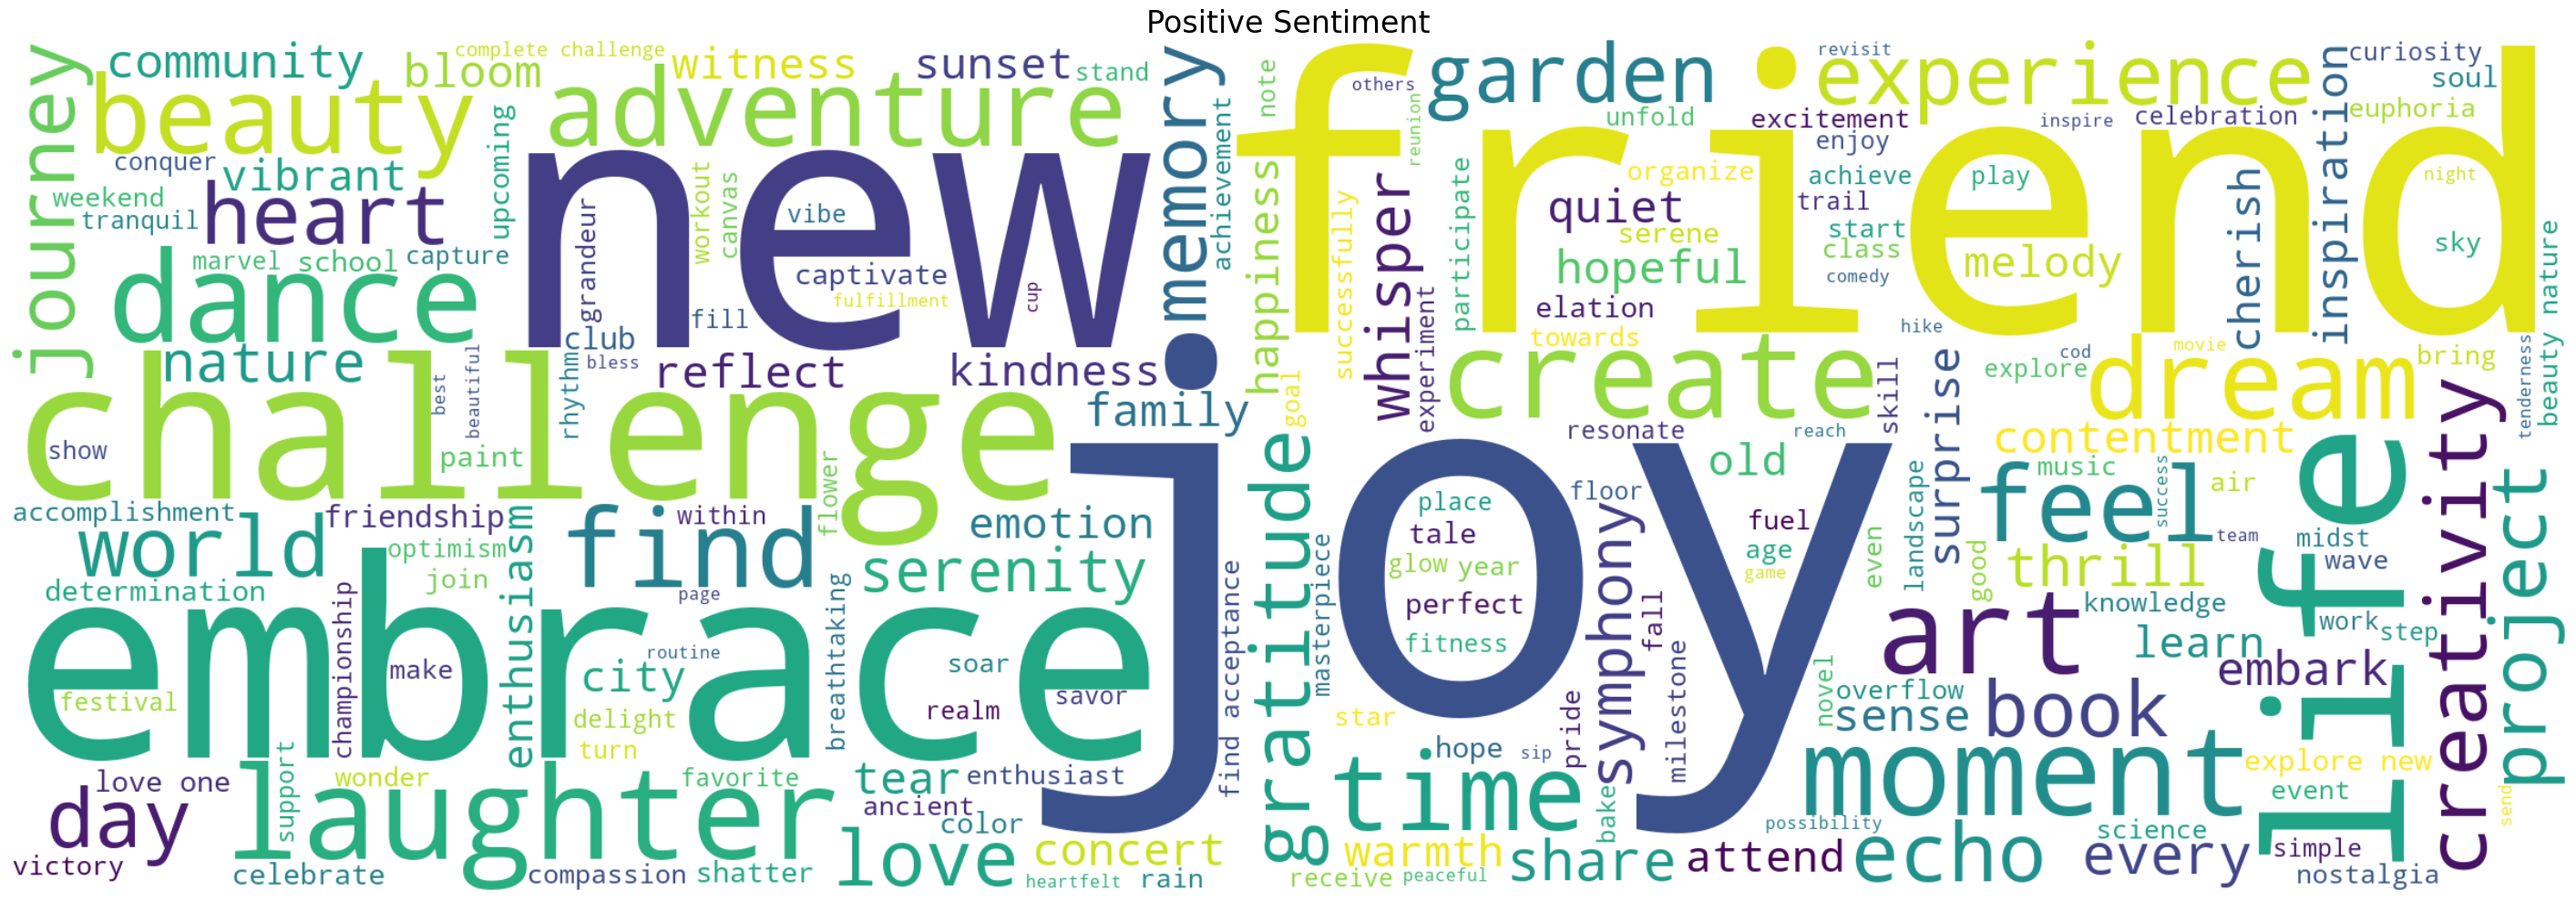

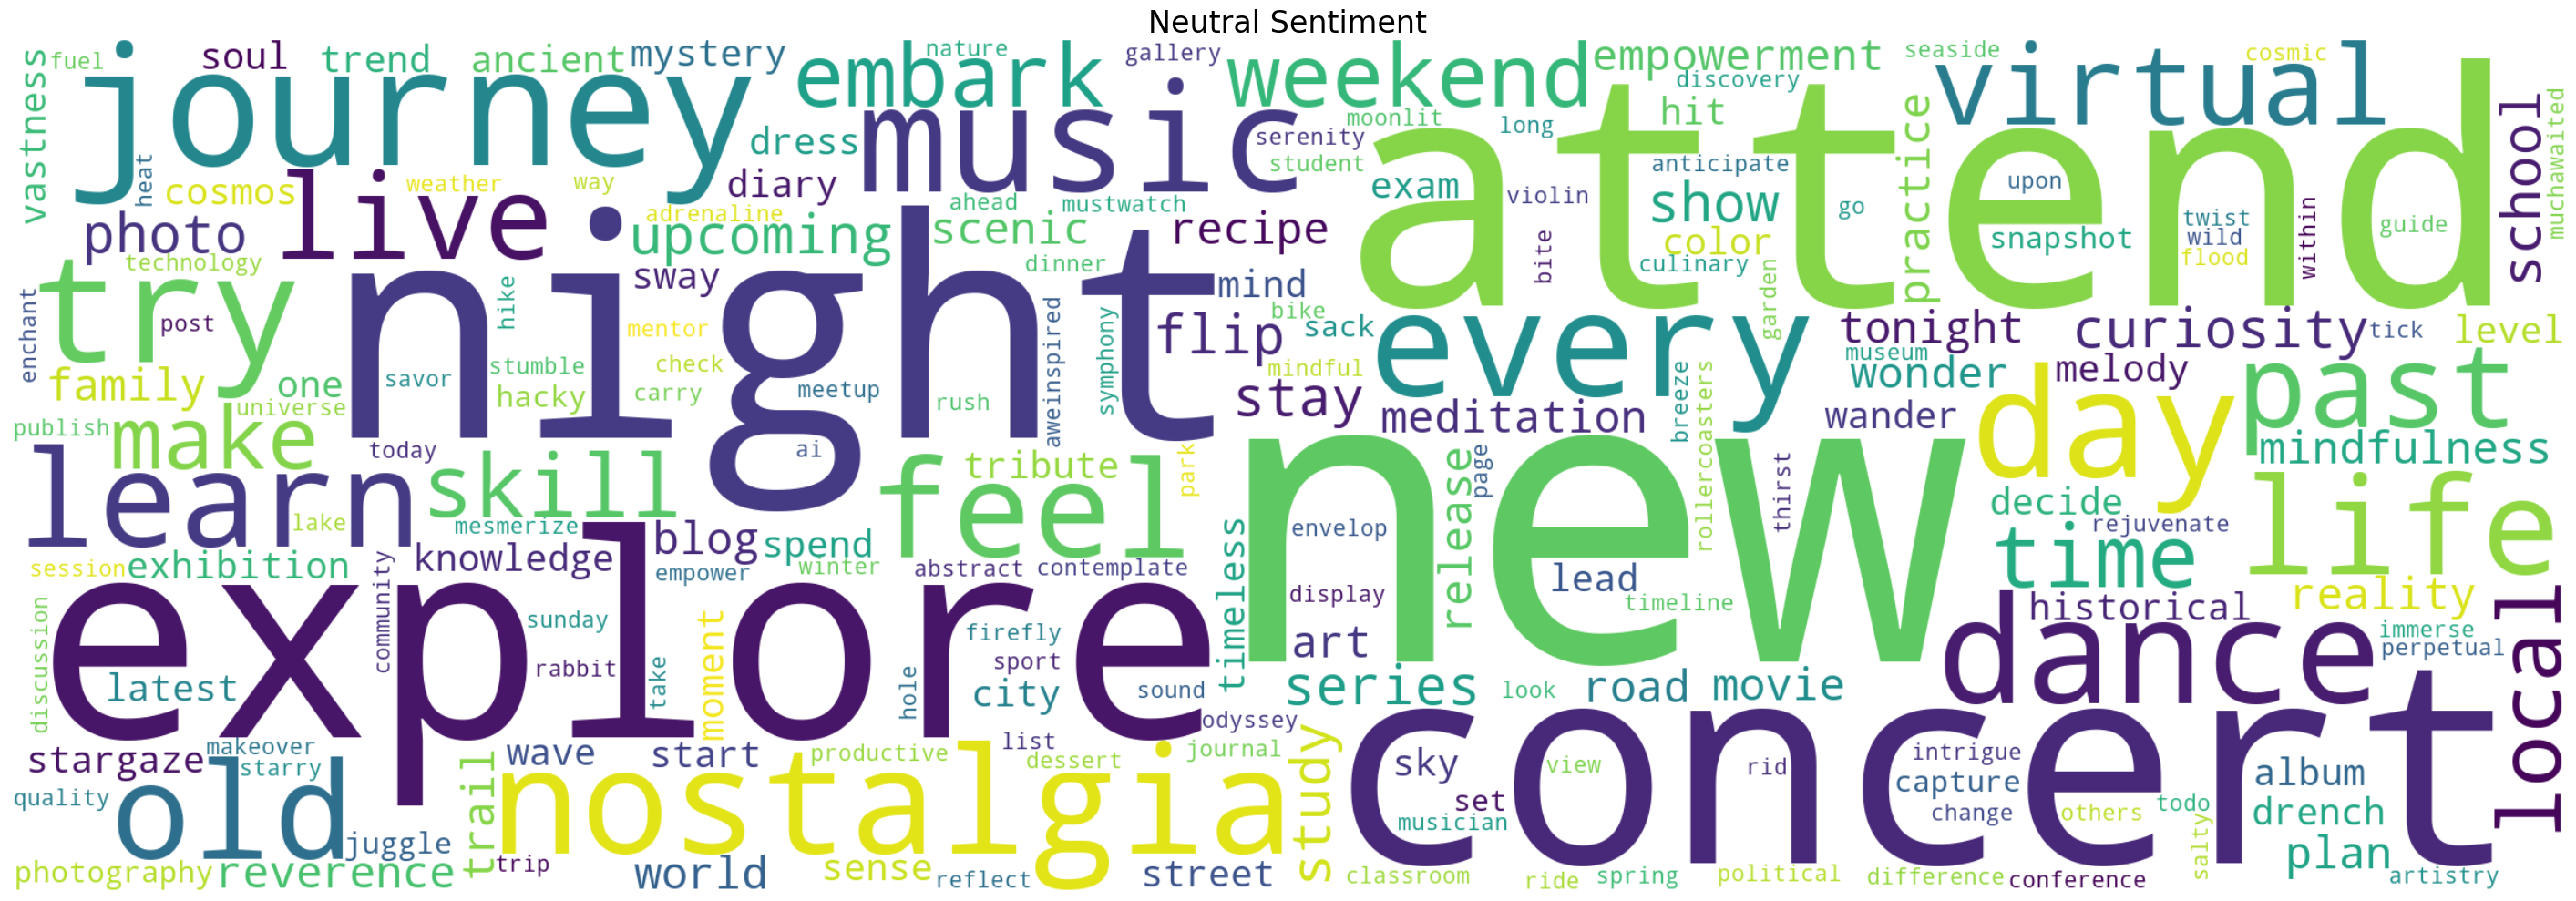

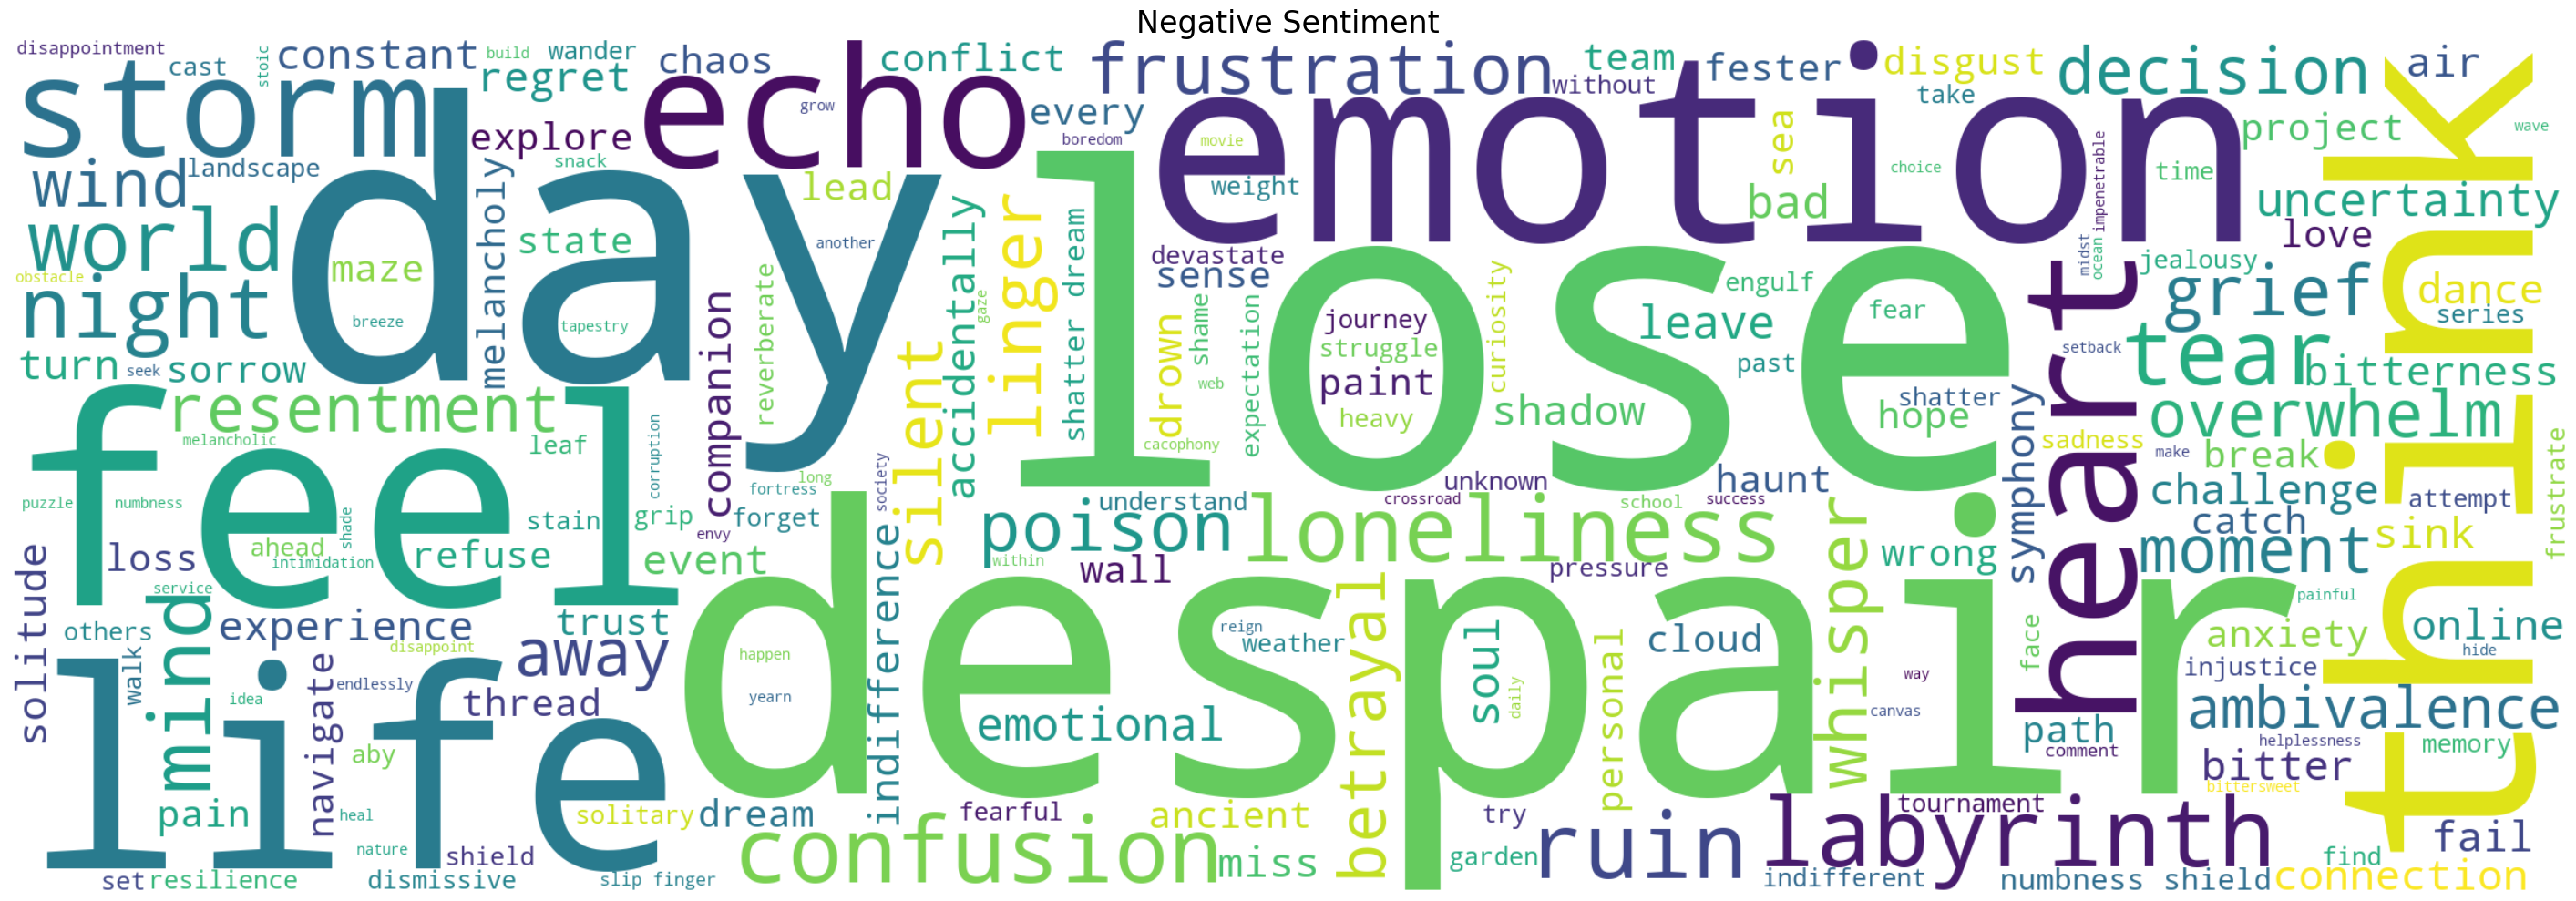

In [58]:
def generate_wordcloud_for_sentiment(sentiment_value, title):
    text = ' '.join(df.loc[df['sentiment_category'] == sentiment_value, 'Text']).strip()
    if text:
        wordcloud = WordCloud(background_color='white', width=2400, height=800).generate(text)
        plt.figure(figsize=(30, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=24)
        plt.tight_layout()
        plt.show()
    else:
        print(f'No text data available for sentiment: {title}')

generate_wordcloud_for_sentiment(1, 'Positive Sentiment')
generate_wordcloud_for_sentiment(0, 'Neutral Sentiment')
generate_wordcloud_for_sentiment(-1, 'Negative Sentiment')

In [59]:
df

Text  sentiment_category
0                             enjoy beautiful day park                   1
1                             traffic terrible morning                  -1
2                                finish amaze workout                    1
3                      excite upcoming weekend getaway                   1
4                        try new recipe dinner tonight                   0
..                                                 ...                 ...
727  collaborate science project receive recognitio...                   1
728  attend surprise birthday party organize friend...                   1
729  successfully fundraise school charity initiati...                   1
730  participate multicultural festival celebrate d...                   1
731  organize virtual talent show challenge time br...                   1

[712 rows x 2 columns]

In [60]:
df['sentiment_category'].value_counts()

sentiment_category
 1    444
-1    192
 0     76
Name: count, dtype: int64

In [61]:
from sklearn.utils import resample

df_pos = df[df['sentiment_category'] == 1]
df_neg = df[df['sentiment_category'] == -1]
df_neu = df[df['sentiment_category'] == 0]

max_count = df['sentiment_category'].value_counts().max()

df_neg_upsampled = resample(df_neg, replace=True, n_samples=max_count, random_state=42)
df_neu_upsampled = resample(df_neu, replace=True, n_samples=max_count, random_state=42)

df_balanced = pd.concat([df_pos, df_neg_upsampled, df_neu_upsampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
df_balanced['sentiment_category'].value_counts()

sentiment_category
 0    444
 1    444
-1    444
Name: count, dtype: int64

In [64]:
df_balanced.columns

Index(['Text', 'sentiment_category'], dtype='object')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Text'])
y = df_balanced['sentiment_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9363295880149812

Confusion Matrix:
 [[82  2  5]
 [ 0 89  0]
 [ 8  2 79]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.91      0.92      0.92        89
           0       0.96      1.00      0.98        89
           1       0.94      0.89      0.91        89

    accuracy                           0.94       267
   macro avg       0.94      0.94      0.94       267
weighted avg       0.94      0.94      0.94       267



In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9026217228464419

Confusion Matrix:
 [[86  0  3]
 [ 0 89  0]
 [12 11 66]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.97      0.92        89
           0       0.89      1.00      0.94        89
           1       0.96      0.74      0.84        89

    accuracy                           0.90       267
   macro avg       0.91      0.90      0.90       267
weighted avg       0.91      0.90      0.90       267



In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9625468164794008

Confusion Matrix:
 [[83  0  6]
 [ 0 89  0]
 [ 3  1 85]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.93      0.95        89
           0       0.99      1.00      0.99        89
           1       0.93      0.96      0.94        89

    accuracy                           0.96       267
   macro avg       0.96      0.96      0.96       267
weighted avg       0.96      0.96      0.96       267



In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8876404494382022

Confusion Matrix:
 [[86  2  1]
 [ 0 89  0]
 [12 15 62]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.97      0.92        89
           0       0.84      1.00      0.91        89
           1       0.98      0.70      0.82        89

    accuracy                           0.89       267
   macro avg       0.90      0.89      0.88       267
weighted avg       0.90      0.89      0.88       267



In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9213483146067416

Confusion Matrix:
 [[85  0  4]
 [ 0 89  0]
 [12  5 72]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.88      0.96      0.91        89
           0       0.95      1.00      0.97        89
           1       0.95      0.81      0.87        89

    accuracy                           0.92       267
   macro avg       0.92      0.92      0.92       267
weighted avg       0.92      0.92      0.92       267



In [75]:
import tensorflow as tf

Unique labels in y (before mapping): [-1  0  1]
Unique labels in y (after mapping): [0 1 2]
X_train shape: (1065, 1971), dtype: float64
X_test shape: (267, 1971), dtype: float64
y_train shape: (1065,), dtype: int32
y_test shape: (267,), dtype: int32
Unique labels in y_train: [0 1 2]
Unique labels in y_test: [0 1 2]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               252416    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 

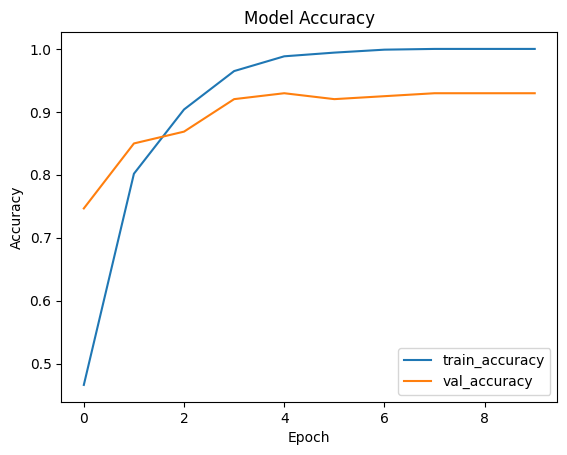

In [82]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

try:
    assert 'df_balanced' in globals(), "df_balanced DataFrame is not defined"
except AssertionError as e:
    print(e)
    raise

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df_balanced['Text']).toarray()
y = df_balanced['sentiment_category']

print("Unique labels in y (before mapping):", np.unique(y))

label_mapping = {-1: 0, 0: 1, 1: 2}
if y.dtype == 'object' or isinstance(y.iloc[0], str):
    y = y.map(label_mapping)
else:
    y = y.replace(label_mapping)  
y = y.astype(np.int32)  

print("Unique labels in y (after mapping):", np.unique(y))

assert not np.any(np.isnan(X)), "X contains NaN values"
assert not np.any(np.isinf(X)), "X contains infinite values"
assert not np.any(np.isnan(y)), "y contains NaN values"
assert not np.any(np.isinf(y)), "y contains infinite values"

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

assert np.all((y_train >= 0) & (y_train <= 2)), "y_train contains invalid labels"
assert np.all((y_test >= 0) & (y_test <= 2)), "y_test contains invalid labels"

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

y_pred = model.predict(X_test, batch_size=32)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nAccuracy:", accuracy_score(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=['negative', 'neutral', 'positive']))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()